# The Neural Dynanmics of Valence and Intensity Encoding in the Amygdala and Prefrontal Cortex

**Authors:** Rahim Hashim, Roberto Gulli, Stefano Fusi, Daniel Salzman <br>
**Notebook Owner:** Rahim Hashim (rh2898@columbia.edu) <br>
***

# Import Libraries / Setting Task Parameters

In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
# Custom modules
import h5_helper
import preprocess_helper
from Path import Path
from Session import Session
pd.options.mode.chained_assignment = None  # default='warn'

ROOT = '/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/'
# ROOT = '/mnt/g/My Drive/Columbia/Salzman/Monkey-Training/'
EXPERIMENT = 'rhAirpuff'
TASK = 'Probabalistic_Airpuff_4x2'

path_obj = Path(ROOT, EXPERIMENT, TASK)

***
# Selecting Dates

In [2]:
# Specifying date/monkey/task
start_date = '2023-01-23' #@param {type:"date"}
end_date = '2023-01-23' #@param {type:"date"}
monkey_input = 'Aragorn' #@param ['Aragorn', 'Gandalf', 'Rob', 'Test']
reprocess_data = False #@param {type:"boolean"}
save_df =  False #@param {type:"boolean"}

# parse data
h5_filenames = h5_helper.h5_pull(path_obj.current_dir) # pull all .h5 files from specified directory
ml_config, trial_record, session_df, error_dict, behavioral_code_dict\
	= preprocess_helper.preprocess_data(h5_filenames,
																			path_obj,
																			start_date,
																			end_date,
																			monkey_input,
																			reprocess_data,
																			save_df)
# dates_selected = ['220913', '220928', '220929', '221006', '221019', '221026',
# 									'221207', '221214', '230102', '230118', '230120']
# session_df = session_df.loc[(session_df['date'].isin(dates_selected))]

Pulling '.h5' files...
Complete: 84 '.h5' files pulled

Files uploaded from processed folder

Pickled Files:
['230123_Aragorn_r1r2_behave.pkl']


***
# Adding Fields / Creating Session Object

In [4]:
from add_fields import add_fields
# import importlib
# importlib.reload(add_fields)

# session_obj contains session metadata
session_obj = Session(session_df, monkey_input, TASK, behavioral_code_dict)

# adds custom fields
session_df, session_obj = add_fields(session_df,
																		 session_obj, 
																		 behavioral_code_dict)
from image_diff import image_diff
FIGURE_SAVE_PATH = image_diff(session_df,
															session_obj,
															path_obj,
															combine_dates=True) # combine_dates=True will combine all dates into analysis
session_obj.save_paths(path_obj.TARGET_PATH, 
											 path_obj.TRACKER_PATH, 
											 path_obj.VIDEO_PATH,
											 FIGURE_SAVE_PATH)
session_df_correct = session_df[session_df['correct'] == 1]

 Creating Session Objects...
  Min Values (X,Y): (-22.763,-27.459)
  Max Values (X,Y): (98.362,134.954)
 Adding additional fields to session_df DataFrame...
  20 new fields added.
  Index(['date', 'session_num', 'subject', 'trial_num', 'block', 'condition',
         'correct', 'error', 'error_type', 'behavioral_code_markers',
         'behavioral_code_times', 'stimuli_name', 'x_pos', 'y_pos', 'reward',
         'reward_prob', 'reward_mag', 'reward_drops', 'reward_length', 'airpuff',
         'airpuff_prob', 'airpuff_mag', 'airpuff_pulses', 'airpuff_side_L',
         'airpuff_side_R', 'eye_x', 'eye_y', 'eye_pupil', 'lick', 'photodiode',
         'trial_start', 'trial_datetime_start', 'trial_datetime_end',
         'Start Trial', 'Fixation On', 'Fixation Success', 'CS On', 'CS Off',
         'Trace Start', 'Trace End', 'Outcome Start', 'Reward Trigger',
         'Airpuff Trigger', 'Outcome', 'Outcome End', 'Manual Reward',
         'End Trial', 'valence', 'lick_raster', 'blink_raster', '

***
## Run All Analysis Functions

  lick_vs_blink.png saved.
  perf_by_fractal.png saved.
  session_latency.png saved.
  outcome_params.png saved.
  session_lick_avg.png saved.
  session_blink_avg.png saved.
  fractal_lick_raster.png saved.
  fractal_blink_raster.png saved.
  raster_by_cond_1.png saved.
lick-duration
  38 (+)(+) (+) 3.282 2.93 0.0833
  38 (+)(+) (-) 3.282 1.879 1.76e-11
  38 (+)(+) (-)(-) 3.282 1.353 2.26e-15
  39 (+) (-) 2.93 1.879 1.04e-06
  39 (+) (-)(-) 2.93 1.353 1.19e-10
  39 (-) (-)(-) 1.879 1.353 0.00906
blink-duration
  38 (+)(+) (+) 0.174 0.304 0.0479
  38 (+)(+) (-) 0.174 0.5 1.36e-06
  38 (+)(+) (-)(-) 0.174 0.651 1.24e-12
  39 (+) (-) 0.304 0.5 0.0078
  39 (+) (-)(-) 0.304 0.651 1.84e-06
  39 (-) (-)(-) 0.5 0.651 0.0242
  raster_by_cond_2.png saved.
lick-duration
  33 (+)(+) (+) 2.528 2.449 0.733
  33 (+)(+) (-) 2.528 2.093 0.0442
  33 (+)(+) (-)(-) 2.528 2.11 0.0516
  33 (+) (-) 2.449 2.093 0.0862
  33 (+) (-)(-) 2.449 2.11 0.0999
  33 (-) (-)(-) 2.093 2.11 0.927
blink-duration
  33 (+)(+

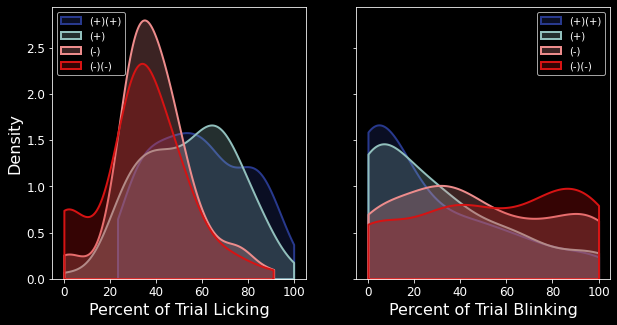

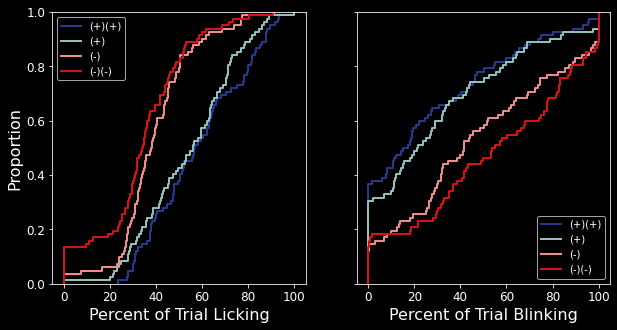

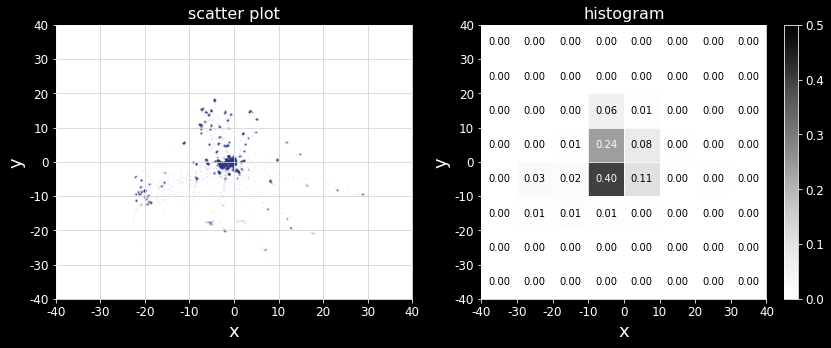

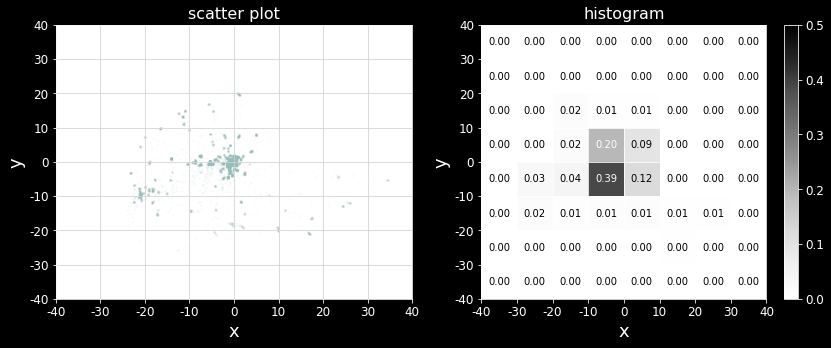

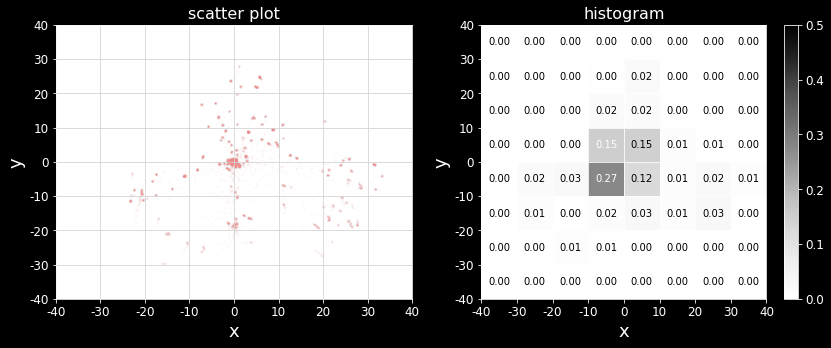

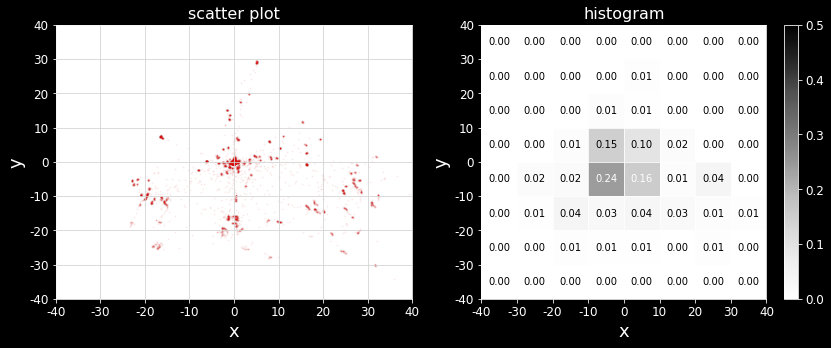

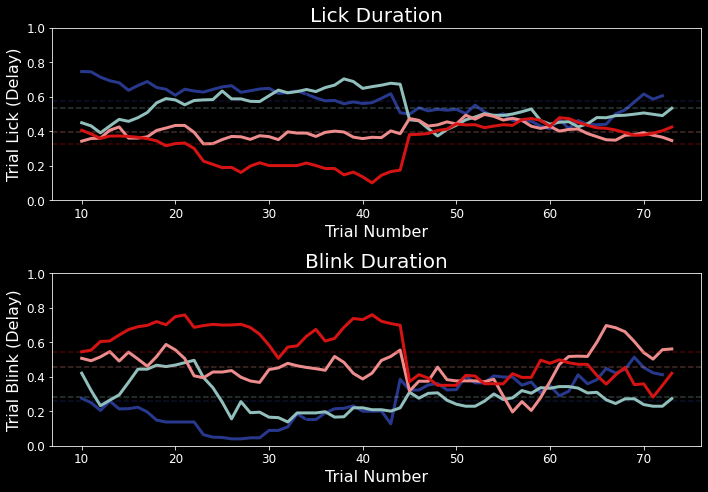

In [30]:
plt.style.use('dark_background')
from run_functions import run_functions
session_obj = run_functions(session_df_correct, session_obj, path_obj, 
														behavioral_code_dict, error_dict, FIGURE_SAVE_PATH)

Total Eye Positions: 1429500
Histogram Positions: 1399485
-40.0   -30.0   -20.0   -10.0   0.0   10.0   20.0   30.0   
[[0.     0.0003 0.0006 0.0007 0.     0.     0.     0.    ]
 [0.     0.0006 0.0021 0.0014 0.     0.     0.     0.    ]
 [0.0003 0.0015 0.0028 0.0014 0.0006 0.     0.     0.    ]
 [0.0005 0.0034 0.009  0.0662 0.0729 0.0078 0.0035 0.0001]
 [0.0004 0.003  0.013  0.3482 0.3523 0.0145 0.001  0.0001]
 [0.     0.0015 0.0073 0.0208 0.0131 0.0016 0.0002 0.    ]
 [0.     0.0006 0.0203 0.0241 0.0019 0.0001 0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]]
outside x,y [-10, 10]: 16.03%
outside x,y [-40, 40]: 2.1%
  eye_heatmap_1.0.png saved.
Total Eye Positions: 1435500
Histogram Positions: 1393885
-40.0   -30.0   -20.0   -10.0   0.0   10.0   20.0   30.0   
[[0.     0.0001 0.0016 0.0035 0.     0.     0.     0.    ]
 [0.0002 0.0006 0.0019 0.0014 0.0002 0.0003 0.     0.    ]
 [0.0006 0.0013 0.0041 0.004  0.0011 0.0003 0.0001 0.    ]
 [0.0003 0.0028 0.0109 0.10

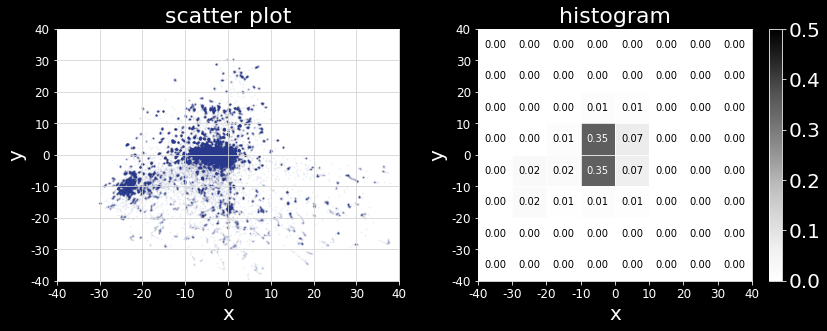

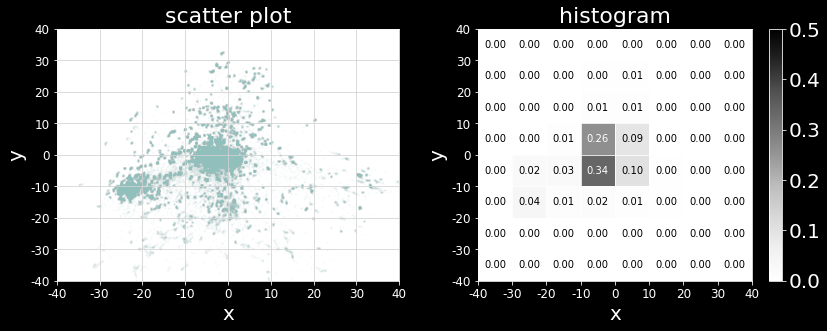

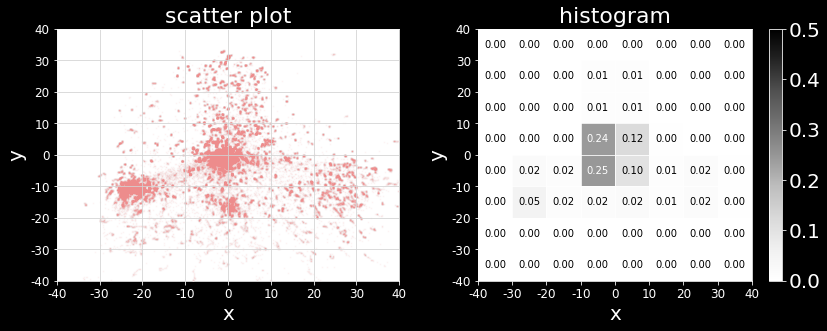

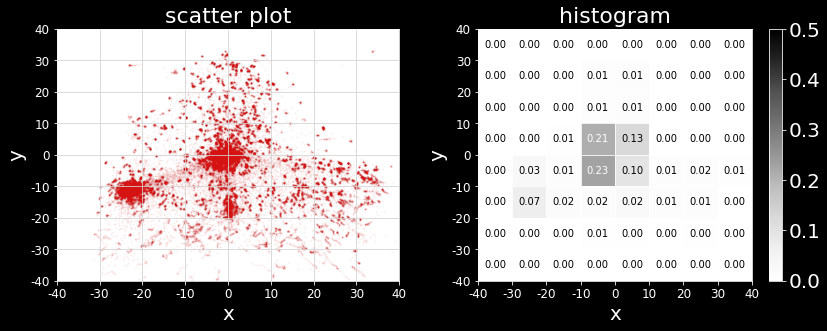

In [23]:
from eyetracking_analysis import eyetracking_analysis
eyetracking_analysis(session_df_correct, session_obj, TRIAL_THRESHOLD=5)

  raster_by_cond_1.png saved.
lick-duration
  533 (+)(+) (+) 3.907 3.385 1.25e-13
  533 (+)(+) (-) 3.907 2.056 2.36e-88
  533 (+)(+) (-)(-) 3.907 2.157 7.25e-81
  534 (+) (-) 3.385 2.056 1.27e-46
  534 (+) (-)(-) 3.385 2.157 1.18e-40
  534 (-) (-)(-) 2.056 2.157 0.308
blink-duration
  533 (+)(+) (+) 0.199 0.262 0.000973
  533 (+)(+) (-) 0.199 0.498 1.87e-45
  533 (+)(+) (-)(-) 0.199 0.529 5.95e-52
  534 (+) (-) 0.262 0.498 1.52e-28
  534 (+) (-)(-) 0.262 0.529 2.71e-34
  534 (-) (-)(-) 0.498 0.529 0.154
  raster_by_cond_2.png saved.
lick-duration
  522 (+)(+) (+) 3.286 2.98 0.000311
  521 (+)(+) (-) 3.286 2.744 6.09e-10
  520 (+)(+) (-)(-) 3.286 2.709 5.73e-11
  521 (+) (-) 2.98 2.744 0.00792
  520 (+) (-)(-) 2.98 2.709 0.00241
  520 (-) (-)(-) 2.744 2.709 0.701
blink-duration
  522 (+)(+) (+) 0.295 0.336 0.0558
  521 (+)(+) (-) 0.295 0.375 0.00023
  520 (+)(+) (-)(-) 0.295 0.438 5.38e-11
  521 (+) (-) 0.336 0.375 0.0712
  520 (+) (-)(-) 0.336 0.438 3.24e-06
  520 (-) (-)(-) 0.375 0.43

ValueError: min() arg is an empty sequence

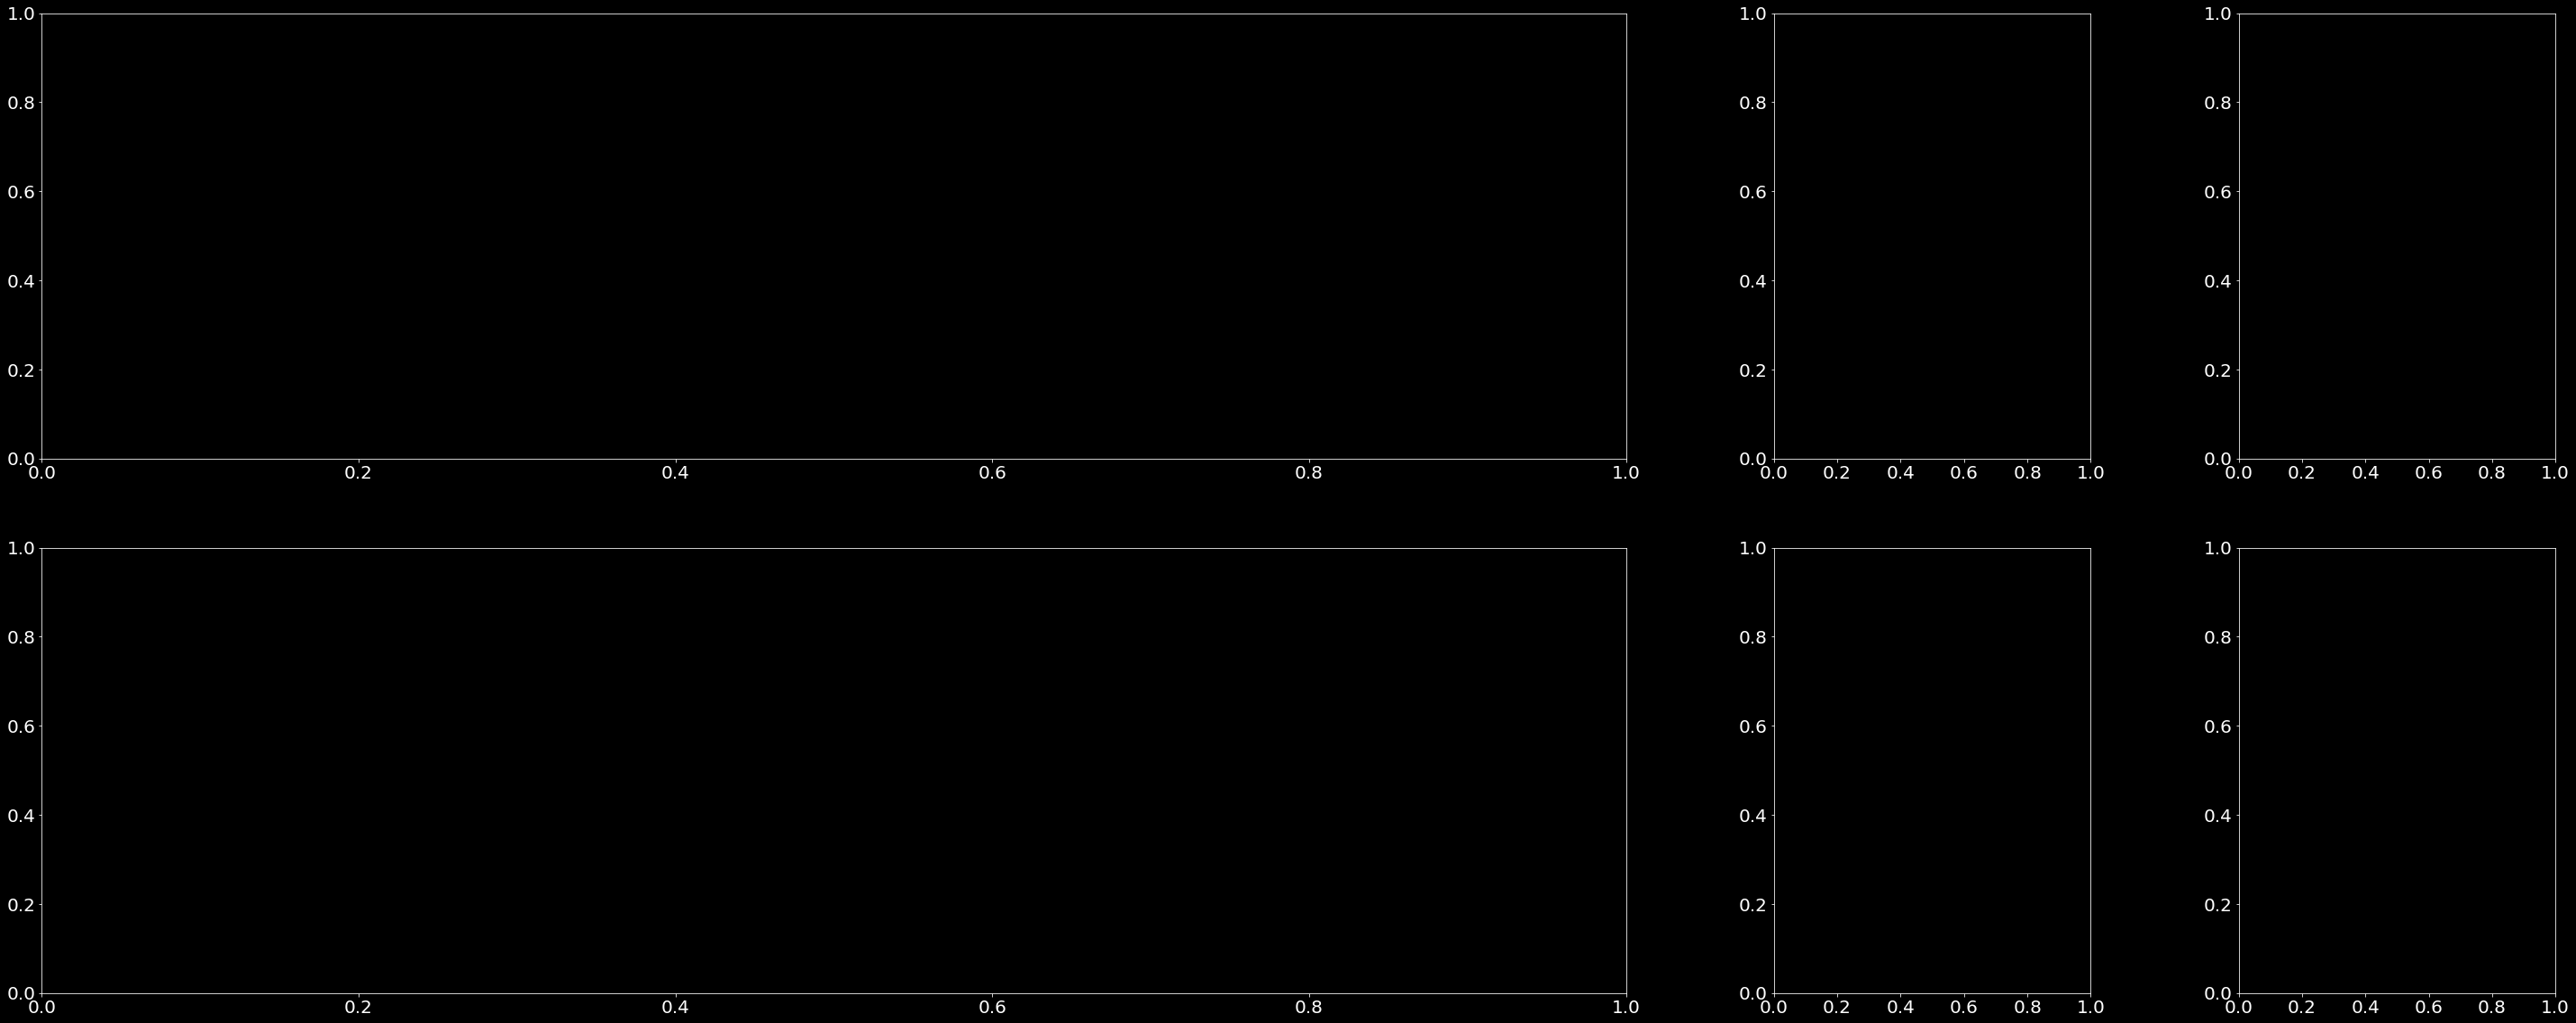

In [16]:
from raster_by_condition import raster_by_condition
from two_sample_test import t_test_moving_avg
for block in sorted(session_df_correct['block'].unique()):
	session_df_condition = session_df_correct[session_df_correct['block'] == block]
	raster_by_condition(session_df_condition, session_obj)
	t_test_moving_avg(session_df_condition, session_obj, block)

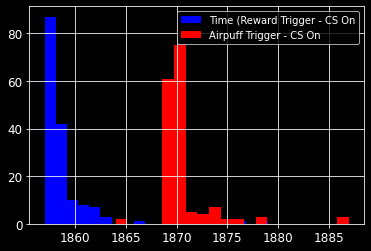

In [31]:
session_df_correct['length'] = session_df_correct['Reward Trigger'] - session_df_correct['CS On']
session_df_correct_1 = session_df_correct[session_df_correct['valence'] > 0]
ax = session_df_correct_1['length'].hist(bins=20, color='blue', label='Time (Reward Trigger - CS On')

session_df_correct['length'] = session_df_correct['Airpuff Trigger'] - session_df_correct['CS On']
session_df_correct_1 = session_df_correct[session_df_correct['valence'] < 0]
session_df_correct_1['length'].hist(bins=20, color='red', ax=ax, label='Airpuff Trigger - CS On')
plt.legend()
plt.show()

In [17]:
blink_trials = session_df_correct[session_df_correct['pupil_binary_zero'] == 1].index.tolist()

/var/folders/8z/8tf_3z4d0_1cgj07xk0dtqq00000gn/T/ipykernel_58733/3651636535.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  f.tight_layout()
/var/folders/8z/8tf_3z4d0_1cgj07xk0dtqq00000gn/T/ipykernel_58733/3651636535.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  f.tight_layout()
/var/folders/8z/8tf_3z4d0_1cgj07xk0dtqq00000gn/T/ipykernel_58733/3651636535.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  f.tight_layout()
/var/folders/8z/8tf_3z4d0_1cgj07xk0dtqq00000gn/T/ipykernel_58733/3651636535.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  f.tight_layout()


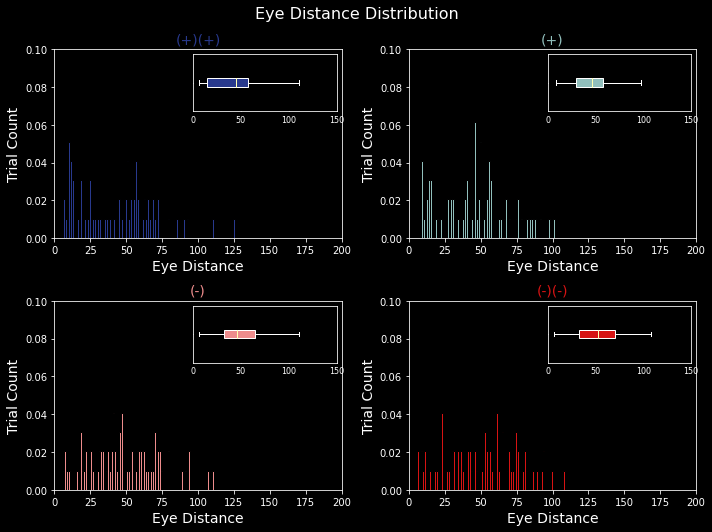

In [6]:
import seaborn as sns
import matplotlib.cm as cm
from PIL import ImageColor
import matplotlib.colors
from mpl_toolkits.axes_grid.inset_locator import inset_axes
# Custom Functions
from eyetracking_analysis import calc_dist

plt.style.use('dark_background')

def plot_dist_histogram(valence_eye_distances, axarr, bins, valence_color, valence_label):
	eye_distances_filtered = sorted([x for x in valence_eye_distances if x != 0], reverse=False)
	results = axarr.hist(eye_distances_filtered, bins=bins, ec='black', facecolor=valence_color, alpha=1, density=True)
	# hist_upper_x = 0.6
	# hist_upper_y = 30
	# xrange = np.arange(0, hist_upper_x, 0.1)
	# xrange = [round(x, 1) for x in xrange]
	# axarr.set_xticks(xrange)
	# axarr.set_xticklabels(xrange)
	# axarr.set_xlim([-0.05, hist_upper_x])
	# axarr.set_ylim([0, hist_upper_y])
	axarr.set_xlabel('Eye Distance', fontsize=14)
	axarr.set_ylabel('Trial Count', fontsize=14)
	boxplot_axes = inset_axes(axarr, width="50%", height="30%", loc=1)
	bp_results = boxplot_axes.boxplot(eye_distances_filtered, vert=False, showfliers=False, patch_artist=True)
	boxplot_axes.tick_params(axis='x', size=0.5)    #setting up X-axis tick color to red
	boxplot_axes.tick_params(axis='y', size=0.5)  #setting up Y-axis tick color to black
	for patch, color in zip(bp_results['boxes'], valence_color):
		rgb = matplotlib.colors.to_rgb(valence_color)
		patch.set_facecolor(rgb)
	xrange = np.arange(0, 200, 50)
	boxplot_axes.set_xticks(xrange)
	boxplot_axes.set_xticklabels(xrange, fontsize=8)
	boxplot_axes.set_yticklabels([])
	# boxplot_axes.set_aspect(.4)
	axarr.set_title(valence_label, fontsize=14, color=valence_color)
	axarr.set_xlim([0,200])
	axarr.set_ylim([0,0.1])
	f.tight_layout()
	whisker_data = bp_results['whiskers']
	lower_whisker, upper_whisker = [item.get_xdata()[1] for item in whisker_data]

f, axarr = plt.subplots(2, 2, figsize=(10, 7.5))
f.suptitle('Eye Distance Distribution', fontsize=16)
all_eye_distances = []
for v_index, valence in enumerate(sorted(session_df_correct['valence'].unique(), reverse=True)):
	# see if 1 is in pupil_raster_window column
	session_valence = session_df_correct[session_df_correct['valence'] == valence]
	# blink_trials = session_valence[session_valence['pupil_binary_zero'] == 1].index.tolist()
	valence_eye_distances = []
	for trial in session_valence.index.tolist():
		trial_index = trial
		# eye_distance = session_valence['eye_distance'][trial_index]
		session_df_selected = session_valence.loc[trial_index]
		trace_start = session_df_selected['Trace Start']
		trace_end = session_df_selected['Trace End']
		eye_x = session_df_selected['eye_x'][trace_start:trace_end]
		eye_y = session_df_selected['eye_y'][trace_start:trace_end]
		eye_coordinates = list(zip(eye_x, eye_y))
		trial_distances = []
		for eye_index, eye_pos in enumerate(eye_coordinates):
			# skip first eye position
			if eye_index == 0:
				continue
			dist = calc_dist(eye_pos[0], eye_coordinates[eye_index-1][0],
											eye_pos[1], eye_coordinates[eye_index-1][1])
			# skip if distance is greater than 10 (caused by blink signal)
			if dist < 10:
				trial_distances.append(dist)
		valence_eye_distances.append(np.nansum(trial_distances))
		all_eye_distances.append(np.nansum(trial_distances))
	eye_distances_filtered_all = sorted([x for x in valence_eye_distances if x != 0], reverse=False)
	if v_index == 0:
		axindex = axarr[0][0]
	elif v_index == 1:
		axindex = axarr[0][1]
	elif v_index == 2:
		axindex = axarr[1][0]
	elif v_index == 3:
		axindex = axarr[1][1]
	valence_color = session_obj.valence_colors[valence]
	valence_label = session_obj.valence_labels[valence]
	bins = np.histogram(all_eye_distances, bins=100)[1] # get the bin edges for all valence eye distances
	plot_dist_histogram(valence_eye_distances, axindex, bins, valence_color, valence_label)
plt.show()

In [7]:
def calc_eye_dist(trial, session_obj, blink_bin_threshold):
	trace_window = session_obj.window_blink
	blink_raster = np.array(trial['pupil_raster_window'])
	trace_off_time = trial['Trace End']
	eye_x, eye_y = trial['eye_x'], trial['eye_y']
	eye_x = eye_x.tolist()[trace_off_time-trace_window:trace_off_time]
	eye_y = eye_y.tolist()[trace_off_time-trace_window:trace_off_time]
	# calculate eye velocities
	eye_coordinates = list(zip(eye_x, eye_y))
	eye_distances = []
	for eye_index, eye_pos in enumerate(eye_coordinates):
		if eye_index == 0:
			dist_val = np.nan
		else:
			dist_val = calc_dist(eye_pos[0], eye_coordinates[eye_index-1][0],
													 eye_pos[1], eye_coordinates[eye_index-1][1])
		eye_distances.append(dist_val)
	trial['eye_distances_window'] = eye_distances
	# calculate eye distances before blinks
	all_blinks = np.where(blink_raster==1)[0]
	if len(all_blinks) == 0:
		trial['eye_distances_preblink'] = np.nan
		return trial
	preblink_indices = []
	preblink_distances = []
	for blink_bin in all_blinks:
		# if blink_bin is less than threshold, add all eye distances before blink
		if blink_bin < blink_bin_threshold:
			preblink_distances.append(eye_distances[:blink_bin])
			preblink_indices += list(range(blink_bin))
		else:
			preblink_bins = list(range(blink_bin-blink_bin_threshold, blink_bin))
			# if preblink_bins are already in preblink_indices, skip
			preblink_distances.append(\
				[eye_distances[i] for i in preblink_bins if i not in preblink_indices])
			preblink_indices += preblink_bins
	trial['eye_distances_preblink'] = preblink_distances
	return trial

blink_bin_threshold = 20
session_df_correct = \
		session_df_correct.apply(calc_eye_dist, session_obj=session_obj, blink_bin_threshold=blink_bin_threshold, axis=1)

Eye Velocity Means
  All: 0.7
  Preblink: 28.68
Eye Velocity Quantiles
 All
  25%: 0.02 | 50%: 0.03 | 75%: 0.06
 Preblink
  25%: 0.09 | 50%: 0.66 | 75%: 4.41


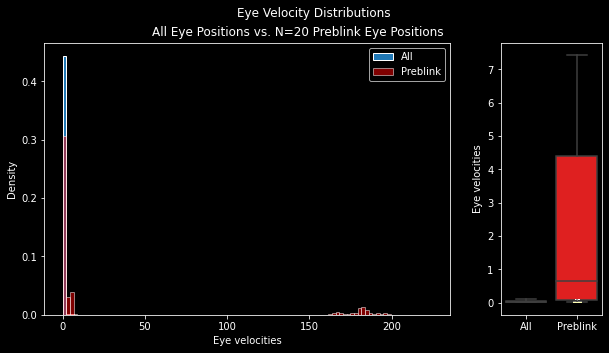

In [8]:
import matplotlib.gridspec as gridspec
blink_bin_threshold = 20
def flattenList(nestedList):
	# check if list is empty
	if not(bool(nestedList)):
		return nestedList
	# to check instance of list is empty or not
	if isinstance(nestedList[0], list):
		# call function with sublist as argument
		return flattenList(*nestedList[:1]) + flattenList(nestedList[1:])
	# call function with sublist as argument
	return nestedList[:1] + flattenList(nestedList[1:])

def plot_eye_dist_histogram(session_df):
	# all distances
	all_distances = session_df_correct['eye_distances_window'].tolist()
	flat_list_all = flattenList(all_distances)
	eye_distances_filtered_all = sorted([x for x in flat_list_all if x > 0.01], reverse=False)

	# preblink distances
	preblink_distances = session_df_correct['eye_distances_preblink'].tolist()
	flat_list_preblink = flattenList(preblink_distances)
	preblink_filtered_all = sorted([x for x in flat_list_preblink if x > 0.01], reverse=False)
	print('Eye Velocity Means')
	print('  All: {}'.format(round(np.nanmean(eye_distances_filtered_all), 2)))
	print('  Preblink: {}'.format(round(np.nanmean(preblink_filtered_all), 2)))
	print('Eye Velocity Quantiles')
	for data in [eye_distances_filtered_all, preblink_filtered_all]:
		if data == eye_distances_filtered_all:
			print(' All')
		else:
			print(' Preblink')
		print('  25%: {} | 50%: {} | 75%: {}'.format(
			round(np.nanquantile(data, 0.25), 2),
			round(np.nanquantile(data, 0.5), 2),
			round(np.nanquantile(data, 0.75), 2)))
	gs_kw = dict(width_ratios=[4, 1])
	f, axarr = plt.subplots(1, 2, figsize=(10,5), gridspec_kw=gs_kw)
	axarr[0].hist(eye_distances_filtered_all, bins=100, density=True, color='#1f77b4', label='All', lw=1, ec='white')
	axarr[0].hist(preblink_filtered_all, bins=100, density=True, color='red', label='Preblink', alpha=0.5, lw=1, ec='white')
	axarr[0].legend()
	axarr[0].set_xlabel('Eye velocities')
	axarr[0].set_ylabel('Density')
	axarr[1].boxplot([eye_distances_filtered_all, preblink_filtered_all], labels=['All', 'Preblink'], showfliers=False)
	ax = sns.boxplot(ax=axarr[1], data=[eye_distances_filtered_all, preblink_filtered_all], 
									palette=['#1f77b4', 'red'], showfliers=False)
	axarr[1].set_xticklabels(['All', 'Preblink'])
	axarr[1].set_ylabel('Eye velocities')
	plt.suptitle('Eye Velocity Distributions')
	plt.text(-2, 1.025, 'All Eye Positions vs. N={} Preblink Eye Positions'.format(blink_bin_threshold), 
					horizontalalignment='center', fontsize=12, transform=ax.transAxes)
	plt.show()

plot_eye_dist_histogram(session_df_correct)

[0, 1, 2, 4, 6, 7, 8, 9, 12, 15, 17, 18, 19, 20, 21, 22, 25, 29, 39, 46, 49, 50, 52, 54, 55, 57, 60, 61, 71, 74, 77, 80, 82, 83, 85, 92, 93, 94, 97, 100, 109, 123, 130, 131, 139, 145, 155, 165, 166, 169, 182, 185, 190, 191, 195, 200, 201, 203, 210, 211, 226, 230, 231, 233, 234, 237, 238, 239, 241, 246, 247, 248, 249, 250, 251, 252, 253, 254, 257, 258, 264, 266, 268, 269, 271, 275, 277, 280, 281, 285, 286, 288, 294, 309, 310, 312, 313, 318, 329, 333, 336, 341, 348, 351, 379, 382, 383, 385, 389, 405, 422]
422 609 1 13.938706873806817 -24.138000923470674 0.0
422 609 2 13.918316995227226 -24.16337017616844 0.03254759792877958
422 609 3 13.918316995227226 -24.16337017616844 0.0
422 609 4 13.917838853600017 -24.158536682494194 0.004857085598857505
422 609 5 13.917838853600017 -24.158536682494194 0.0
422 609 6 13.917360720806997 -24.153703278123995 0.004856995858925768
422 609 7 13.917360720806997 -24.153703278123995 0.0
422 609 8 13.917360720806997 -24.153703278123995 0.0
422 609 9 13.917360

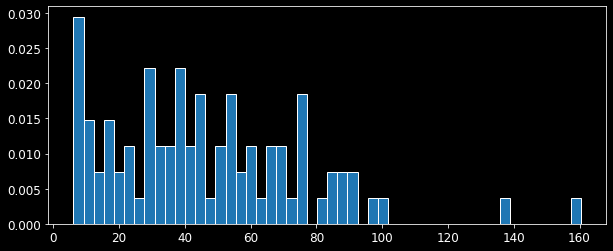

0.0
0.03254759792877958
0.0
0.004857085598857505
0.0
0.004856995858925768
0.0
0.0
0.0
0.05474085797797046
0.0
0.00456213645565656
0.0
0.06510054162735118
0.0
0.08421801531757837
0.0
0.038665330219333785
0.0
0.045603480623663685
0.0
0.044133530470321584
0.0
0.07751147598550777
0.0
0.01052119791339852
0.0
0.0
0.0


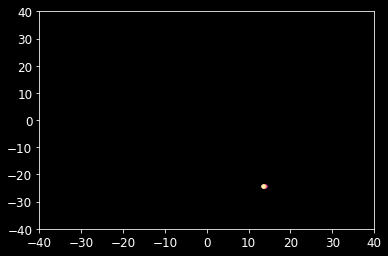

In [105]:
num_samples = 30
palette_tab10 = sns.color_palette("magma", num_samples)

blink_trials = session_df_correct[session_df_correct['pupil_binary_zero'] == 1].index.tolist()
print(blink_trials)
for trial in blink_trials:
	trial_index = trial
	session_df_selected = session_df_correct.loc[trial_index]
	trace_start = session_df_selected['Trace Start']
	trace_end = session_df_selected['Trace End']
	eye_x = session_df_selected['eye_x'][trace_start:trace_end]
	eye_y = session_df_selected['eye_y'][trace_start:trace_end]
	eye_coordinates = list(zip(eye_x, eye_y))
	for eye_index, eye_pos in enumerate(eye_coordinates):
		# skip first eye position
		if eye_index == 0:
			continue
		dist = calc_dist(eye_pos[0], eye_coordinates[eye_index-1][0],
										eye_pos[1], eye_coordinates[eye_index-1][1])
		# skip if distance is greater than 10 (caused by blink signal)
		if dist > 10:
			continue
		all_eye_distances.append(dist)
eye_distances_filtered_all = sorted([x for x in valence_eye_distances if x != 0], reverse=False)
pupil = session_df_selected['eye_pupil'][trace_start:trace_end]
pupil_raster = session_df_selected['pupil_raster_window']
all_blinks = np.where(pupil==0)[0]
for b_index, blink in enumerate(all_blinks):
	if b_index == 0 or blink-1 not in all_blinks:
		eye_x_preblink = eye_x[blink-num_samples:blink]
		eye_y_preblink = eye_y[blink-num_samples:blink]
		eye_preblink = list(zip(eye_x_preblink, eye_y_preblink))
		for eye_index, eye_pos in enumerate(eye_preblink):
			if eye_index == 0:
				continue
			print(trial_index, blink, eye_index,eye_pos[0], eye_pos[1],
				calc_dist(eye_pos[0], eye_preblink[eye_index-1][0],
									eye_pos[1], eye_preblink[eye_index-1][1]))
		break
	break
f, axarr = plt.subplots(1, 1, figsize=(10, 4))
axarr.hist(eye_distances_filtered_all, bins=50, ec='white', color='#1f77b4', density=True)
plt.show()

first_blink = np.where(pupil==0)[0][0]
eye_x_preblink = eye_x[first_blink-num_samples:first_blink]
eye_y_preblink = eye_y[first_blink-num_samples:first_blink]

eye_preblink = list(zip(eye_x_preblink, eye_y_preblink))
for eye_index, eye_pos in enumerate(eye_preblink):
	if eye_index == 0:
		continue
	print(
		calc_dist(eye_pos[0], eye_preblink[eye_index-1][0],
							eye_pos[1], eye_preblink[eye_index-1][1]))
for eye_index, eye_pos in enumerate(eye_preblink):
	plt.scatter(eye_pos[0], eye_pos[1], s=8, color=palette_tab10[eye_index])
plt.xlim([-40, 40])
plt.ylim([-40, 40])
plt.show()

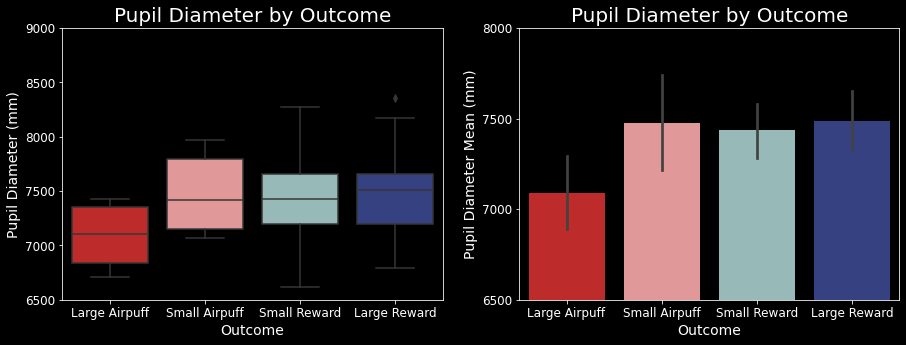

valence
-1.0     7
-0.5     7
 0.5    23
 1.0    24
Name: pupil_mean, dtype: int64
         pupil_preblink
valence                
-1.0                 15
-0.5                 24
 0.5                  4
 1.0                  8


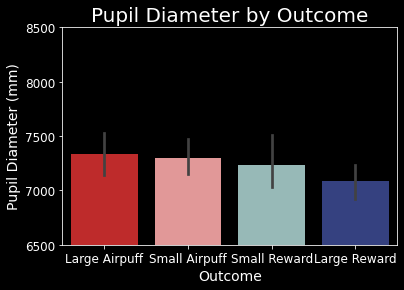

In [32]:
from pupil_analysis import pupil_valence_no_blink, pupil_preblink
pupil_valence_no_blink(session_df_correct, session_obj)
pupil_preblink(session_df_correct, session_obj)

In [33]:
def anticipatory_behavior(session_df_correct, session_obj):
	keys = ['blink_duration_offscreen',
					'blink_duration_sig',
					'lick_duration',
					'pupil_raster_window', 
					'eye_distance']
	valences = sorted(session_df_correct['valence'].unique(), reverse=True)
	for key in keys:
		print(key)
		for valence in valences:
			measure_list = []
			df_valence = session_df_correct[session_df_correct['valence'] == valence]
			for index, trial in df_valence.iterrows():
				measure_list.append(np.sum(trial[key]))
			print('  valence:', valence)
			print('    mean:', round(np.nanmean(measure_list), 3))
			print('    std:', round(np.std(measure_list), 3))

anticipatory_behavior(session_df_correct, session_obj)

blink_duration_offscreen
  valence: 1.0
    mean: 0.265
    std: 0.302
  valence: 0.5
    mean: 0.299
    std: 0.308
  valence: -0.5
    mean: 0.469
    std: 0.34
  valence: -1.0
    mean: 0.537
    std: 0.348
blink_duration_sig
  valence: 1.0
    mean: 0.029
    std: 0.084
  valence: 0.5
    mean: 0.056
    std: 0.159
  valence: -0.5
    mean: 0.115
    std: 0.174
  valence: -1.0
    mean: 0.101
    std: 0.175
lick_duration
  valence: 1.0
    mean: 2.923
    std: 1.006
  valence: 0.5
    mean: 2.707
    std: 1.014
  valence: -0.5
    mean: 1.978
    std: 0.822
  valence: -1.0
    mean: 1.704
    std: 0.976
pupil_raster_window
  valence: 1.0
    mean: 29.024
    std: 83.876
  valence: 0.5
    mean: 55.671
    std: 158.917
  valence: -0.5
    mean: 115.0
    std: 174.277
  valence: -1.0
    mean: 100.854
    std: 175.281
eye_distance
  valence: 1.0
    mean: 35.509
    std: 56.671
  valence: 0.5
    mean: 31.807
    std: 20.924
  valence: -0.5
    mean: 39.068
    std: 22.053
  valence:

In [ ]:
import matplotlib.pyplot as plt
from plot_helper import set_plot_params

def eye_data_delay(row, trace_window):
	delay_end = row['Trace End']
	eye_x = row['eye_x'][delay_end-trace_window:delay_end]
	eye_y = row['eye_y'][delay_end-trace_window:delay_end]
	row['eye_x_delay'] = eye_x
	row['eye_y_delay'] = eye_y
	return row

def eye_outside_threshold(row):
	blink_count_window = row['blink_count_window']
	eye_x = row['eye_x_delay']
	eye_y = row['eye_y_delay']
	try:
		# print(list(zip(eye_x, eye_y, blink_raster)))
		eye_x_threshold = [x for x_index, x in enumerate(eye_x)
												if blink_count_window[x_index] == 1]
		eye_y_threshold = [y for y_index, y in enumerate(eye_y)
												if blink_count_window[y_index] == 1]
	except:
		eye_x_threshold = []
		eye_y_threshold = []
	row['eye_x_threshold'] = eye_x_threshold
	row['eye_y_threshold'] = eye_y_threshold
	return row

def eye_signal_delay(row, session_obj):
	eye_blink_signal = session_obj.blink_signal
	BLINK_SIGNAL = [(eye_blink_signal['eye_x_min'], eye_blink_signal['eye_y_min']),
									(eye_blink_signal['eye_x_max'], eye_blink_signal['eye_y_max'])]
	eye_x = row['eye_x_delay']
	eye_y = row['eye_y_delay']
	blink_count = [1 if (x,y) in BLINK_SIGNAL else 0 
									for (x,y) in zip(eye_x, eye_y)]
	eye_x_threshold = [x for x_index, x in enumerate(eye_x)
											if blink_count[x_index] == 0]
	eye_y_threshold = [y for y_index, y in enumerate(eye_y)
											if blink_count[y_index] == 0]

	row['eye_x_sig'] = eye_x_threshold
	row['eye_y_sig'] = eye_y_threshold

	return row

def plot_eye_data(session_df, session_obj):
	import seaborn as sns

	# trial_numbers = input('Enter trial numbers to plot (e.g. 1,2,3...{}): '.format(len(session_df)))
	# row = session_df.iloc[int(trial_numbers)]
	# trial_numbers = list(row.index)
	COLORS = session_obj.valence_colors
	session_df = session_df.apply(eye_data_delay, 
					trace_window = session_obj.window_blink, axis=1)
	session_df = session_df.apply(eye_outside_threshold, axis=1)
	session_df = session_df.apply(eye_signal_delay, 
															  session_obj=session_obj,
																axis=1)
	for v_index, valence in enumerate(sorted(session_df['valence'].unique(), reverse=True)):
		set_plot_params(FONT=12,
										AXES_TITLE=16,
										AXES_LABEL=18, 
										TICK_LABEL=12, 
										LEGEND=10, 
										TITLE=20)
		f, ax = plt.subplots(1, 1, figsize=(10, 10))
		df = session_df[session_df['valence'] == valence]
		for index, row in df.iterrows():
			x = row['eye_x_delay']
			y = row['eye_y_delay']
			z = list(range(len(row['eye_x_delay'])))
			scatterplot = ax.scatter(x, y, c=z, cmap='viridis', s=1)
		
		eye_x = df['eye_x_delay'].tolist()
		eye_y = df['eye_y_delay'].tolist()
		x_flatten = [item for sublist in eye_x for item in sublist]
		y_flatten = [item for sublist in eye_y for item in sublist]
		# ax2.hist2d(x_flatten, y_flatten, bins=100, cmap='viridis', 
		# 							range=[[-100, 100], [-100, 100]], 
		# 							density=True)
		sns.jointplot(x=x_flatten, 
									y=y_flatten, 
									color=COLORS[v_index],
									xlim = (-100,100),
									ylim = (-100,100))

		ax.set_title('Valence: {}'.format(valence))
		ax.set_xlim([-100, 100])
		ax.set_ylim([-100, 100])
		f.colorbar(scatterplot, ax=ax)

TRIAL_THRESHOLD = 10
# only include trials after subject has seen fractal <TRIAL_THRESHOLD> number of times
session_df_count = session_df_correct[session_df_correct['fractal_count_in_block'] > TRIAL_THRESHOLD]
plot_eye_data(session_df_count, session_obj)

In [ ]:
lick_data_duration = raster_by_condition(session_df_correct, session_obj, error_dict, session_obj)

  raster_by_cond.svg saved.


In [119]:
session_df_correct.loc[(session_df_correct['valence'] == -1) & 
											 (pd.isna(session_df_correct['Manual Reward']) == True) &
											#  (session_df_correct['blink_duration_sig'] > 0.2) &
											 (session_df_correct['blink_duration_offscreen'] > 0.30) &
											 (session_df_correct['eye_distance'] > 10) & 
											 (session_df_correct['lick_duration'] < 3)]

,date,session_num,subject,trial_num,block,condition,correct,error,error_type,behavioral_code_markers,...,blink_duration_sig,blink_duration_offscreen,eye_distance,latency,eye_delay_x,eye_delay_y,pupil_mean,pupil_pre_CS_mean,first_blink,pupil_preblink
28,230102,0,Aragorn,29,1,1,1,0,0,"[9, 100, 101, 102, 103, 104, 105, 106, 107, 10...",...,0.000,0.665,23.148455,6.62,"[-13.532043718133336, -13.532043718133336, -13...","[0.9338133859688735, 0.9338133859688735, 0.933...",7930.871,7358.090,0.0,NaN
39,230102,0,Aragorn,40,1,1,1,0,0,"[9, 100, 101, 102, 103, 104, 105, 106, 107, 10...",...,0.170,0.496,44.516367,8.98,"[-3.0607574259388692, -3.0607574259388692, -3....","[-3.0528102796994223, -3.0528102796994223, -3....",6820.968,8146.070,0.0,NaN
47,230102,0,Aragorn,48,1,1,1,0,0,"[9, 100, 101, 102, 103, 104, 105, 106, 107, 10...",...,0.000,1.000,46.125273,7.59,"[15.052364741964935, 15.052364741964935, 15.05...","[-4.387278752621336, -4.387278752621336, -4.38...",7975.203,7520.950,0.0,NaN
61,230102,0,Aragorn,62,1,1,1,0,0,"[9, 100, 101, 102, 103, 104, 105, 106, 107, 10...",...,0.000,0.880,44.811338,6.23,"[-9.773130488763508, -9.773130488763508, -9.80...","[17.31425746539104, 17.31425746539104, 17.3108...",8197.302,6869.975,56.0,NaN
78,230102,0,Aragorn,79,1,1,1,0,0,"[9, 100, 101, 102, 103, 104, 105, 106, 107, 10...",...,0.175,0.446,43.893900,6.89,"[-1.5911206245299536, -1.5911206245299536, -1....","[-1.4106192664160446, -1.4106192664160446, -1....",6347.408,7327.085,0.0,NaN
82,230102,0,Aragorn,83,1,1,1,0,0,"[9, 100, 101, 102, 103, 104, 105, 106, 107, 10...",...,0.000,0.498,35.704005,6.09,"[-5.230166365997028, -5.230166365997028, -5.68...","[-9.656413080374604, -9.656413080374604, -10.1...",7552.344,8000.105,502.0,7676.773333
87,230102,0,Aragorn,88,1,1,1,0,0,"[9, 100, 101, 102, 103, 104, 105, 106, 107, 10...",...,0.000,0.412,53.271071,6.06,"[-20.62414043816674, -20.62422905064023, -20.6...","[-8.831146744988006, -8.835626915152409, -8.83...",7744.374,7236.330,189.0,NaN
90,230102,0,Aragorn,91,1,1,1,0,0,"[9, 100, 101, 102, 103, 104, 105, 106, 107, 10...",...,0.000,0.972,18.206341,10.87,"[5.739424441832508, 5.739424441832508, 5.74312...","[15.729766764903305, 15.729766764903305, 15.73...",8541.794,8048.860,28.0,NaN
109,230102,0,Aragorn,110,1,1,1,0,0,"[9, 100, 101, 102, 103, 104, 105, 106, 107, 10...",...,0.663,1.000,22.318959,6.14,"[74.22152851611771, 74.22152851611771, 74.2215...","[102.91984414006484, 102.91984414006484, 102.9...",2655.651,7156.175,0.0,NaN
124,230102,0,Aragorn,125,1,1,1,0,0,"[9, 100, 101, 102, 103, 104, 105, 106, 107, 10...",...,0.000,1.000,47.769084,401.37,"[22.134933441264803, 22.13142291274051, 22.131...","[8.837278231659909, 8.858138830274982, 8.85813...",8656.590,8375.560,0.0,NaN


In [64]:
session_df_correct.loc[(session_df_correct['valence'] == 1) & 
											 (session_df_correct['blink_in_window'] == 0) & 
											 (session_df_correct['eye_distance'] < 5) &
											 (session_df_correct['lick_duration'] > 4)].head()

,date,session_num,subject,trial_num,block,condition,correct,error,error_type,behavioral_code_markers,...,blink_duration_sig,blink_duration_offscreen,eye_distance,latency,eye_delay_x,eye_delay_y,pupil_mean,pupil_pre_CS_mean,first_blink,pupil_preblink
319,230102,0,Aragorn,320,2,2,1,0,0,"[9, 100, 101, 102, 103, 104, 105, 106, 107, 10...",...,0.0,0.0,4.866324,6.63,"[0.5446342258491891, 0.5446342258491891, 0.544...","[2.531750219178305, 2.531750219178305, 2.52751...",7158.954,6975.370,NaN,NaN
321,230102,0,Aragorn,322,2,2,1,0,0,"[9, 100, 101, 102, 112, 103, 104, 105, 106, 10...",...,0.0,0.0,4.768543,6.69,"[-0.13454438197982668, -0.13454438197982668, -...","[0.10533945122307176, 0.10533945122307176, 0.1...",6990.172,7334.410,NaN,NaN
373,230102,0,Aragorn,374,2,2,1,0,0,"[9, 100, 101, 102, 112, 103, 104, 105, 106, 10...",...,0.0,0.0,4.328158,9.77,"[-0.1628031231145913, -0.1628031231145913, -0....","[0.20732594033731003, 0.20732594033731003, 0.1...",7067.850,7587.110,NaN,NaN
444,230102,0,Aragorn,445,2,2,1,0,0,"[9, 100, 101, 102, 103, 104, 105, 106, 107, 10...",...,0.0,0.0,4.186030,10.03,"[0.06540593868565127, 0.06599191566805981, 0.0...","[-0.12333990246786522, -0.13199189592146973, -...",7034.175,7061.360,NaN,NaN
473,230102,0,Aragorn,474,2,2,1,0,0,"[9, 100, 101, 102, 103, 104, 105, 106, 107, 10...",...,0.0,0.0,4.291415,6.61,"[-1.49482053511235, -1.49482053511235, -1.4948...","[-0.17526287609827376, -0.17526287609827376, -...",7238.892,7077.505,NaN,NaN


In [120]:
session_df_selected = session_df_correct[session_df_correct['trial_num'] == 315]
session_df_selected[['valence',
										 'lick_duration',
										 'blink_duration_sig',
										 'blink_duration_offscreen',
										 'Airpuff Trigger',
										 'Manual Reward']]

,valence,lick_duration,blink_duration_sig,blink_duration_offscreen,Airpuff Trigger,Manual Reward
314,-1.0,2.755968,0.0,1.0,4005,<NA>


Total Eye Positions: 1500
Histogram Positions: 1500
-40.0   -30.0   -20.0   -10.0   0.0   10.0   20.0   30.0   
[[0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.452  0.     0.     0.     0.     0.    ]
 [0.     0.3773 0.012  0.12   0.     0.     0.     0.    ]
 [0.     0.     0.     0.0387 0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]]
outside x,y [-10, 10]: 84.13%
outside x,y [-40, 40]: 0.0%
  eye_heatmap_-1.0.png saved.


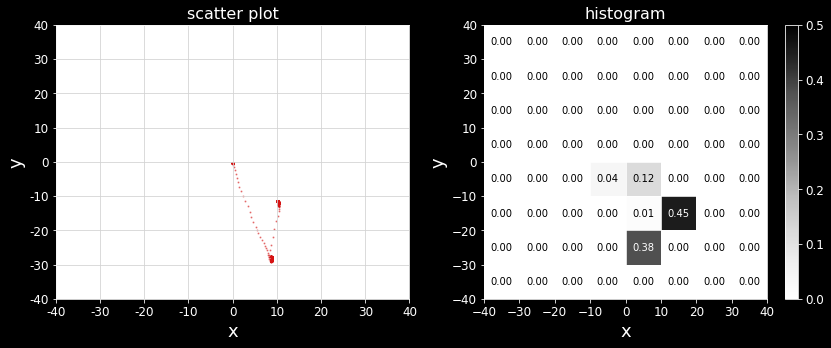

In [121]:
from eyetracking_analysis import eyetracking_analysis
eyetracking_analysis(session_df_selected, session_obj, TRIAL_THRESHOLD=None)

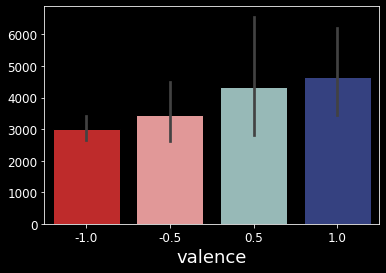

In [14]:
from session_timing import plot_latency
plot_latency(session_df_correct, session_obj)

In [15]:
session_df_correct['valence_1_back'] = session_df_correct['valence'].shift(1)
session_df_correct.groupby('valence_1_back')['Fixation Success'].median()

valence_1_back
-1.0    2299.0
-0.5    2161.5
 0.5    2136.0
 1.0    2954.0
Name: Fixation Success, dtype: float64

In [16]:
session_df_correct.groupby('valence_1_back')['latency'].mean()

valence_1_back
-1.0    16.501020
-0.5    19.708673
 0.5    13.320619
 1.0    22.993918
Name: latency, dtype: float64

In [ ]:
session_df_correct[['valence', 'valence_1_back', 'Fixation On', 'Fixation Success', 'CS On']].head(20)

,valence,valence_1_back,Fixation On,Fixation Success,CS On
0,-1.0,NaN,211,924,931
1,-0.5,-1.0,1103,1799,1811
2,1.0,-0.5,1040,1583,1592
3,1.0,1.0,1847,2522,2538
4,0.5,1.0,1847,2523,2538
5,0.5,0.5,1043,1737,1752
6,-0.5,0.5,1066,1758,1773
7,-1.0,-0.5,1045,1752,1769
8,-0.5,-1.0,1086,1779,1794
10,-1.0,-0.5,1034,1803,1818


In [ ]:
session_df_correct['Fixation Success'] - session_df_correct['Fixation On']

1       542
2       745
3       537
4       793
5       673
       ... 
601     757
602    1172
604    7830
605     744
606     725
Length: 351, dtype: Int32

In [16]:
def trial_time(row):
	row['Trial Time'] = row['Outcome'] - row['CS On']
	return row

session_df_correct = session_df_correct.apply(trial_time, axis=1)
session_df_correct[['Trial Time']].head(20)

,Trial Time
0,<NA>
1,1746
2,1724
3,1726
4,<NA>
6,1719
8,<NA>
9,<NA>
10,<NA>
11,<NA>
